Notebook massively inspired from : https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_columns', 100)

In [2]:
df= pd.read_csv('dfValid_Xexog_y.csv')
df.head(10)

,#LineFullDataSet,Timestamp,AirHumidity,AirPressure,AirTemperature,GasCHRatio,GasCO2Concentration,GasEthaneConcentration,GasHexaneConcentration,GasHhvEnergy,GasIbutaneConcentration,GasIpentaneConcentration,GasLhvEnergy,GasMethaneConcentration,GasN2Concentration,GasNbutaneConcentration,GasNeopentaneConcentration,GasNpentaneConcentration,GasPropaneConcentration,GasRelativeDensity,GasWobbeInf,GasWobbeSup,GrossPower,GrossEfficiency
0,1199,2015-03-22 23:00:00,75.381580,1012.281667,24.882820,3.159809,1.231261,4.645220,0.105123,41.276754,0.338723,0.108599,37.415562,86.756768,4.381941,0.434519,0.0,0.094981,1.965464,0.644118,46.468250,51.401799,642.936012,55.870035
1,1200,2015-03-23 00:00:00,70.840570,1011.627800,25.362420,3.160114,1.230425,4.640570,0.105533,41.275488,0.340175,0.109898,37.454562,86.688370,4.397743,0.436528,0.0,0.095875,1.964265,0.644451,46.454585,51.381693,648.545777,56.527582
2,1201,2015-03-23 01:00:00,67.683015,1011.111889,25.848530,3.160419,1.242197,4.627870,0.104465,41.274222,0.343888,0.111197,37.296274,86.663580,4.399205,0.439288,0.0,0.096450,1.979045,0.645019,46.445205,51.371858,629.601801,56.923884
3,1202,2015-03-23 02:00:00,63.917820,1010.511385,25.776187,3.160723,1.247295,4.618640,0.106071,41.272956,0.346094,0.112496,37.287564,86.650192,4.435064,0.444298,0.0,0.098997,1.969762,0.645287,46.430018,51.355793,629.878983,56.877601
4,1203,2015-03-23 03:00:00,55.975115,1010.119500,25.868055,3.161028,1.238268,4.604286,0.110483,41.201310,0.347224,0.113795,37.278854,86.648904,4.499998,0.448395,0.0,0.100627,1.953770,0.645133,46.419204,51.335278,646.498867,57.086776
5,1204,2015-03-23 04:00:00,57.767290,1010.157000,26.052524,3.160576,1.228012,4.589931,0.111894,41.205127,0.345152,0.113922,37.272413,86.689467,4.485496,0.446516,0.0,0.100861,1.943481,0.644815,46.411545,51.339709,620.907617,57.122591
6,1205,2015-03-23 05:00:00,56.608070,1010.460000,24.882820,3.159996,1.217756,4.578464,0.111919,41.208945,0.343786,0.112800,37.286801,86.666979,4.470993,0.437817,0.0,0.100299,1.947558,0.645016,46.413762,51.350713,643.721550,57.224748
7,1206,2015-03-23 06:00:00,54.593460,1011.479800,25.140622,3.160194,1.207500,4.583429,0.112590,41.212762,0.342215,0.112056,37.255850,86.702603,4.466818,0.441665,0.0,0.099135,1.940718,0.644679,46.420673,51.350159,524.551808,55.969234
8,1207,2015-03-23 07:00:00,58.955440,1011.889500,25.138026,3.160423,1.181979,4.598464,0.111716,41.244633,0.343112,0.111726,37.285220,86.680913,4.480629,0.437142,0.0,0.098978,1.945919,0.644663,46.428049,51.355781,511.149940,55.350307
9,1208,2015-03-23 08:00:00,64.628540,1013.011333,26.558160,3.160988,1.175644,4.614965,0.108616,41.263870,0.344541,0.111086,37.302445,86.646898,4.489106,0.445691,0.0,0.099375,1.961666,0.645007,46.435426,51.360382,597.989620,57.081290


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrossEfficiency'>

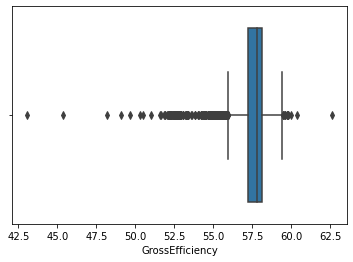

In [12]:
sns.boxplot(df.GrossEfficiency)

In [18]:
from scipy import stats
z= np.abs(stats.zscore(df.GrossEfficiency))
print(z)

[1.44237425 0.860353   0.50957089 ... 3.7762214  4.24844006 4.07551507]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

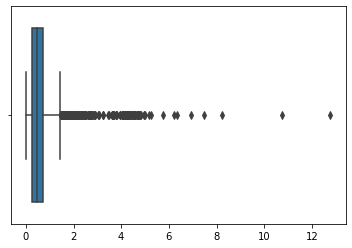

In [20]:
sns.boxplot(z)

# Test data

In [24]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


# Standard Deviation Method

In [28]:
data = df.GrossEfficiency
# calculate summary statistics
data_mean, data_std = df.GrossEfficiency.mean(), df.GrossEfficiency.std()
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [30]:
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 110
Non-outlier observations: 4407


# Interquartile Range Method

In [31]:

from numpy import percentile
# seed the random number generator
seed(1)
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=57.252, 75th=58.138, IQR=0.886
Identified outliers: 304
Non-outlier observations: 4213


# Automatic Outlier Detection

In [42]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
 

df= pd.read_csv('dfValid_Xexog_y.csv')

y = df['GrossEfficiency']
X = df.drop(['GrossEfficiency','#LineFullDataSet','Timestamp'], axis=1)

#Scaling
scaler_data = MinMaxScaler()
X = scaler_data.fit_transform(X)
y=y.values.reshape(-1,1)
y = scaler_data.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
R2=model.score(X_train, y_train)
print('r2: %.3f' % R2)
# # The coefficients
# print("Coefficients: \n", model.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, yhat))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, yhat))

(3026, 21) (3026, 1)
(2944, 21) (2944, 1)
MAE: 0.019
r2: 0.720


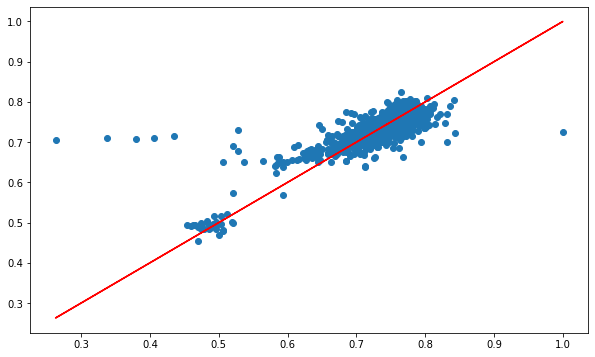

In [46]:
#predictions = model.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test, yhat)
plt.plot(y_test, y_test,'r')

# Subset of outliers

In [3]:
df_outlier = df[df["GrossEfficiency"] < df.GrossEfficiency.mean()]

In [5]:
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537 entries, 0 to 4516
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   #LineFullDataSet            1537 non-null   int64  
 1   Timestamp                   1537 non-null   object 
 2   AirHumidity                 1537 non-null   float64
 3   AirPressure                 1537 non-null   float64
 4   AirTemperature              1537 non-null   float64
 5   GasCHRatio                  1537 non-null   float64
 6   GasCO2Concentration         1537 non-null   float64
 7   GasEthaneConcentration      1537 non-null   float64
 8   GasHexaneConcentration      1537 non-null   float64
 9   GasHhvEnergy                1537 non-null   float64
 10  GasIbutaneConcentration     1537 non-null   float64
 11  GasIpentaneConcentration    1537 non-null   float64
 12  GasLhvEnergy                1537 non-null   float64
 13  GasMethaneConcentration     1537 

In [6]:

df_outlier.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#LineFullDataSet,1537.0,4072.888094,1980.556645,1199.000000,2023.000000,4213.000000,5550.000000,8015.000000
AirHumidity,1537.0,64.238070,17.647758,5.081742,55.325882,69.041789,77.003502,93.120660
AirPressure,1537.0,1005.103485,5.690893,990.700050,1000.359375,1005.589000,1010.077333,1015.980000
AirTemperature,1537.0,31.111108,3.644067,21.731770,28.352249,31.295570,33.610020,45.406900
GasCHRatio,1537.0,3.166997,0.028652,3.135841,3.155464,3.160754,3.165212,3.313306
GasCO2Concentration,1537.0,1.077827,0.202423,0.626070,1.048590,1.145178,1.197962,1.643321
GasEthaneConcentration,1537.0,4.778235,0.992212,3.950408,4.425083,4.547201,4.647294,9.079770
GasHexaneConcentration,1537.0,0.138647,0.046793,0.087451,0.116797,0.128018,0.138820,0.380298
GasHhvEnergy,1537.0,41.534927,0.994103,40.847124,41.190835,41.276764,41.382975,46.325830
GasIbutaneConcentration,1537.0,0.343218,0.024463,0.270338,0.330659,0.342365,0.352409,0.494504


<AxesSubplot:xlabel='GrossEfficiency', ylabel='Count'>

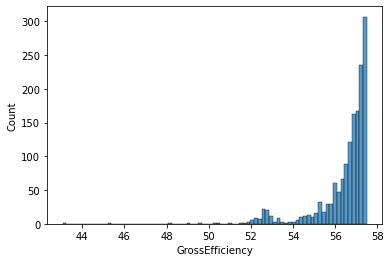

In [7]:
#REgarder l'histogramme de 'GrossEfficiency'
sns.histplot(x='GrossEfficiency', data=df_outlier)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrossEfficiency'>

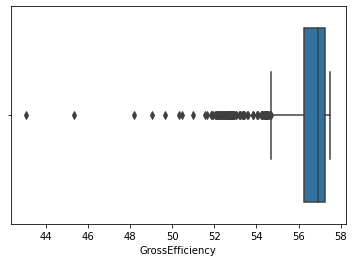

In [13]:
sns.boxplot(df_outlier.GrossEfficiency)

<AxesSubplot:>

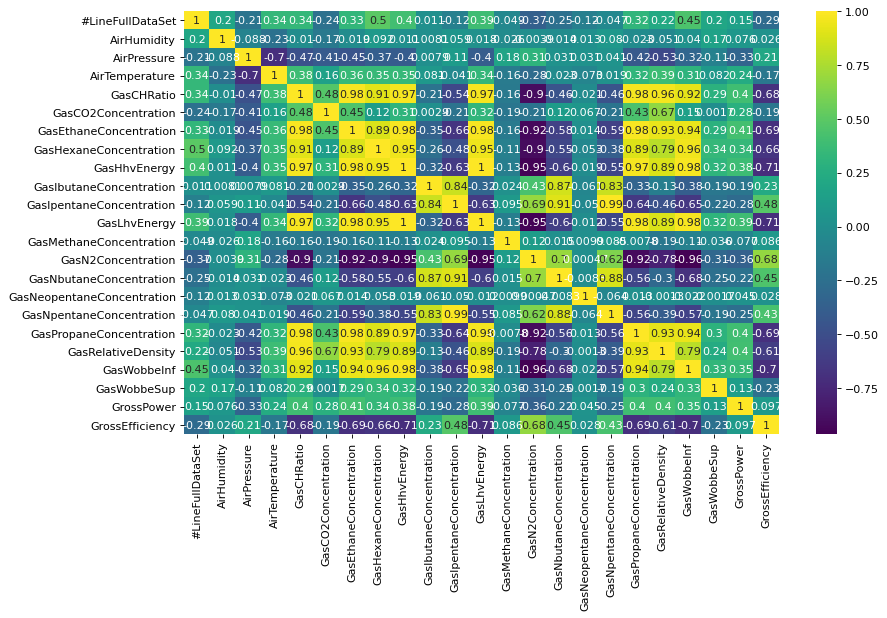

In [8]:
from matplotlib.pyplot import figure
figure(figsize=(12, 7), dpi=80)
sns.heatmap(df_outlier.corr(), annot=True,cmap="viridis")

In [9]:
#Sort the most important features for 'GrossEfficiency'
df_outlier.corr()['GrossEfficiency'].sort_values()

GasLhvEnergy                 -0.707515
GasHhvEnergy                 -0.706488
GasWobbeInf                  -0.703350
GasPropaneConcentration      -0.689169
GasEthaneConcentration       -0.687755
GasCHRatio                   -0.681506
GasHexaneConcentration       -0.661871
GasRelativeDensity           -0.614413
#LineFullDataSet             -0.288559
GasWobbeSup                  -0.232632
GasCO2Concentration          -0.194332
AirTemperature               -0.174186
AirHumidity                   0.026313
GasNeopentaneConcentration    0.028312
GasMethaneConcentration       0.085660
GrossPower                    0.097406
AirPressure                   0.208830
GasIbutaneConcentration       0.229277
GasNpentaneConcentration      0.426070
GasNbutaneConcentration       0.452361
GasIpentaneConcentration      0.478615
GasN2Concentration            0.681642
GrossEfficiency               1.000000
Name: GrossEfficiency, dtype: float64

In [10]:
from scipy import stats

In [ ]:
z= np.abs(stats.zscore(df.GrossEfficiency))